## Сегментация изображений

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

def read_image(filename):
    return Image.open(filename, 'r')

def img_to_matrix(img):
    return np.asarray(img)

def show_matrix(matrix):
    plt.imshow(matrix, cmap='gray')
    plt.show()

def grayscale(matrix):
    return matrix.mean(axis=2)

def dump_matrix(matrix, filename, grayscale=True):
    with open(filename, 'w') as f:
        f.write('{} {}\n'.format(matrix.shape[0], matrix.shape[1]))
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                if grayscale:
                    f.write('{} '.format(matrix[i][j]))
                else:
                    f.write('{} {} {} '.format(*matrix[i][j][:3],))
            f.write('\n')
            
def load_matrix(filename):
    with open(filename) as f:
        n, m = f.readline().split()
        matrix = np.zeros((int(n), int(m)))
        for i, line in enumerate(f):
            matrix[i, :] = list(map(float, line.split()))
    return matrix

def test_labels(matrix):
    labels = np.zeros((matrix.shape[0], matrix.shape[1]))
    labels[labels.shape[0] / 3. : 2 * labels.shape[0] / 3., labels.shape[1] / 3. : 2 * labels.shape[1] / 3.] = 1
    return labels

def visualize_clusters(matrix, labels):
    plt.imshow(matrix, cmap='gray')
    for l in [0, 1]:
        plt.contour(labels == l, contours=1, colors=[plt.cm.spectral(l / 2)])

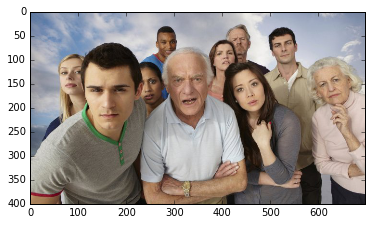

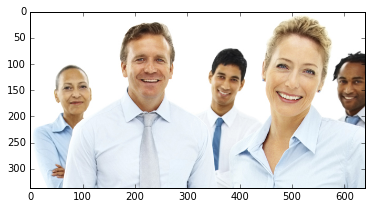

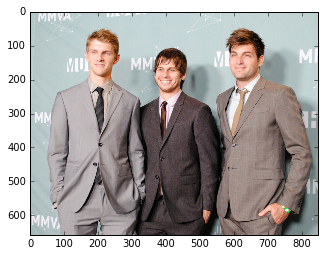

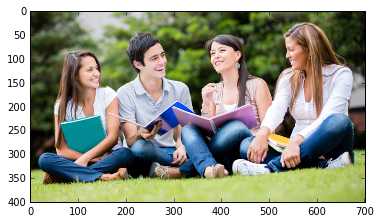

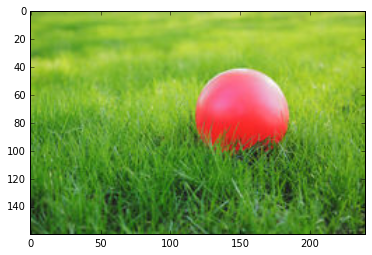

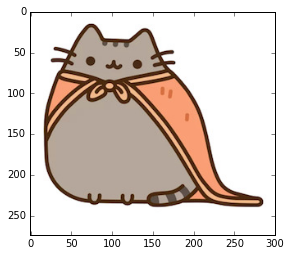

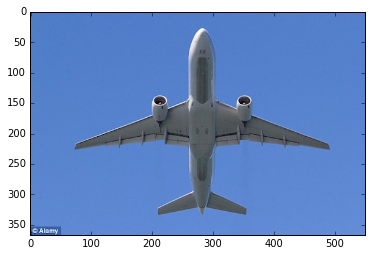

In [15]:
for i in range(1, 8):
    img = read_image('{}.jpg'.format(i))
    matrix = img_to_matrix(img)
    show_matrix(matrix)
    dump_matrix(grayscale(matrix), '{}_gs.dat'.format(i), grayscale=True)
    dump_matrix(matrix, '{}_rgb.dat'.format(i), grayscale=False)

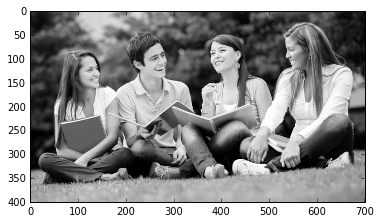

In [3]:
show_matrix(grayscale(img_to_matrix(img)))

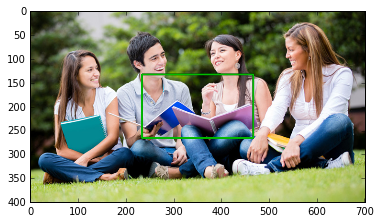

In [4]:
matrix = img_to_matrix(img)
visualize_clusters(matrix, test_labels(matrix))

In [5]:
dump_matrix(grayscale(matrix), 'matrix.dat')

In [6]:
!head -n1 matrix.dat

400 702


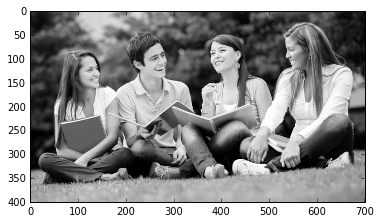

In [7]:
show_matrix(load_matrix('matrix.dat'))